<a href="https://colab.research.google.com/github/HyrinOIBSIP/OIBSIP/blob/main/Task3_CarPricePrediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the models and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
#loading the datset to the df
df=pd.read_csv('/content/archive (7).zip')
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.shape

(301, 9)

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
df.Selling_type.value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [ ]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Selling_type']=le.fit_transform(df['Selling_type'])
df['Transmission']=le.fit_transform(df['Transmission'])
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [ ]:
df.Transmission.unique()

array([1, 0])

In [ ]:
df.Fuel_Type.unique()

array([2, 1, 0])

In [ ]:
df.Selling_type.unique()

array([0, 1])

In [ ]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
one_hot=pd.get_dummies(df['Car_Name'])
df=pd.concat([df,one_hot],axis=1)
df=df.drop(['Car_Name'],axis=1)

In [ ]:
X=df.drop(['Selling_Price'],axis=1)

In [ ]:
Y=df['Selling_Price']

In [ ]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.dtypes

Year               int64
Present_Price    float64
Driven_kms         int64
Fuel_Type          int64
Selling_type       int64
                  ...   
sx4                uint8
verna              uint8
vitara brezza      uint8
wagon r            uint8
xcent              uint8
Length: 105, dtype: object

In [ ]:
X_train

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,800,Activa 3g,Activa 4g,...,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
184,2008,0.750,26000,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132,2017,0.950,3500,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,2008,0.787,50000,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,2015,6.800,36000,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,2016,1.500,8700,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2013,0.570,18000,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,2011,12.480,45000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,2014,3.450,16500,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,2011,10.000,69341,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ***Liner Regression Model***

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_train)

In [ ]:
#to calculate te error Score (biggger is better)
error_score=metrics.r2_score(Y_train,y_pred)
error_score

0.9477802651725578

***Visualization for Trained Data Prediction***

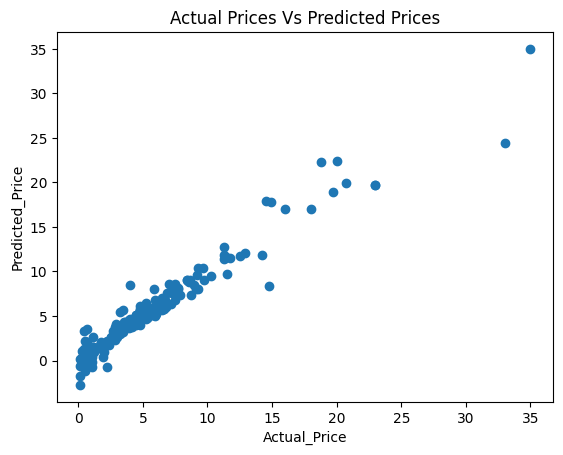

In [ ]:
plt.scatter(Y_train,y_pred)
#plt.figure(figsize=(5,7))
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

In [ ]:
#training with the test dataset
y_test_pred=model.predict(X_test)
error_score=metrics.r2_score(Y_test,y_test_pred)
print(error_score)

0.900877896709472


***Visualization for Test Data Prediction***

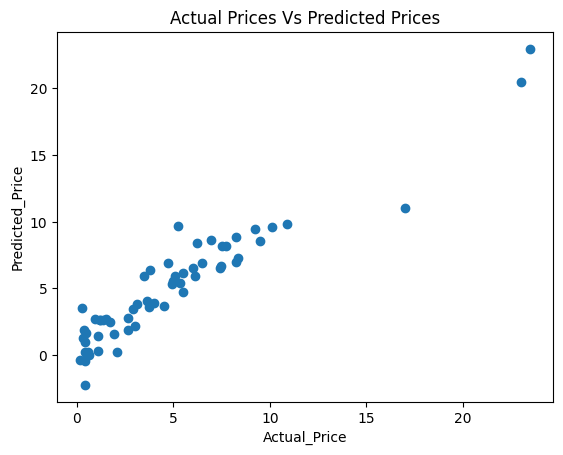

In [ ]:
plt.scatter(Y_test,y_test_pred)
#plt.figure(figsize=(5,7))
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

# ***Lasso Model***

***Train Data Training***

In [ ]:
model_Lasso=Lasso()
model_Lasso.fit(X_train,Y_train)
y_predtrain_Lasso=model_Lasso.predict(X_train)
error_score=metrics.r2_score(Y_train,y_predtrain_Lasso)
print(error_score)

0.8476678444782832


***Test Data Training***

In [ ]:
model_Lasso.fit(X_test,Y_test)
y_predtest_Lasso=model_Lasso.predict(X_test)
error_score=metrics.r2_score(Y_test,y_predtest_Lasso)
print(error_score)

0.8486217383050892


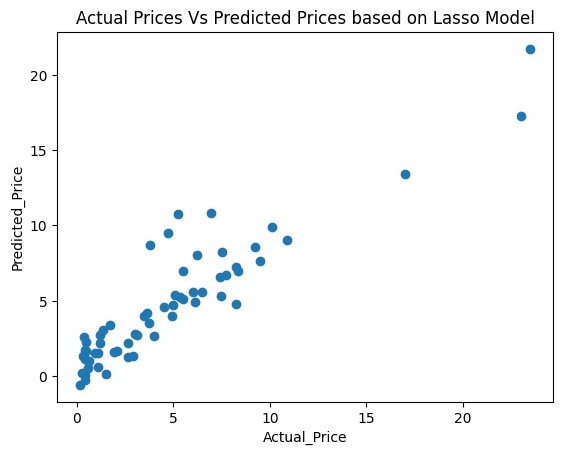

In [ ]:
plt.scatter(Y_test,y_predtest_Lasso)
#plt.figure(figsize=(5,7))
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual Prices Vs Predicted Prices based on Lasso Model')
plt.show()